In [1]:
import mne
mne.viz.set_browser_backend("matplotlib")
from mne import concatenate_epochs, concatenate_raws
# mne.viz.set_3d_backend("notebook")
from matplotlib import pyplot as plt
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
from mne_bids import BIDSPath, read_raw_bids
from itertools import product
from tqdm import tqdm
import os

Using matplotlib as 2D backend.


In [3]:
mag_ch_names = ['MLC11-1609','MLC12-1609','MLC13-1609','MLC14-1609','MLC15-1609','MLC16-1609','MLC17-1609','MLC21-1609','MLC22-1609','MLC23-1609','MLC24-1609','MLC25-1609','MLC31-1609','MLC32-1609','MLC41-1609','MLC42-1609','MLC51-1609','MLC52-1609','MLC53-1609','MLC54-1609','MLC55-1609','MLC61-1609','MLC62-1609','MLC63-1609',
 'MLF11-1609','MLF12-1609','MLF13-1609','MLF14-1609','MLF21-1609','MLF22-1609','MLF23-1609','MLF24-1609','MLF31-1609','MLF32-1609','MLF33-1609','MLF34-1609','MLF35-1609','MLF41-1609','MLF42-1609','MLF43-1609','MLF44-1609','MLF45-1609','MLF46-1609','MLF51-1609','MLF52-1609','MLF53-1609','MLF54-1609','MLF55-1609','MLF56-1609','MLF61-1609','MLF62-1609','MLF63-1609','MLF64-1609','MLF65-1609','MLF66-1609','MLF67-1609',
 'MLO11-1609','MLO12-1609','MLO13-1609','MLO14-1609','MLO21-1609','MLO22-1609','MLO23-1609','MLO24-1609','MLO31-1609','MLO32-1609','MLO33-1609','MLO34-1609','MLO41-1609','MLO42-1609','MLO43-1609','MLO44-1609','MLO51-1609','MLO52-1609','MLO53-1609',
 'MLP11-1609','MLP12-1609','MLP21-1609','MLP22-1609','MLP23-1609','MLP31-1609','MLP32-1609','MLP33-1609','MLP34-1609','MLP35-1609','MLP41-1609','MLP42-1609','MLP43-1609','MLP44-1609','MLP45-1609','MLP51-1609','MLP52-1609','MLP53-1609','MLP54-1609','MLP55-1609','MLP56-1609','MLP57-1609',
 'MLT11-1609','MLT12-1609','MLT13-1609','MLT14-1609','MLT15-1609','MLT16-1609','MLT21-1609','MLT22-1609','MLT23-1609','MLT24-1609','MLT25-1609','MLT26-1609','MLT27-1609','MLT31-1609','MLT32-1609','MLT33-1609','MLT34-1609','MLT35-1609','MLT36-1609','MLT37-1609','MLT41-1609','MLT42-1609','MLT43-1609','MLT44-1609','MLT45-1609','MLT46-1609','MLT47-1609','MLT51-1609','MLT52-1609','MLT53-1609','MLT54-1609','MLT55-1609','MLT56-1609','MLT57-1609',
 'MRC11-1609','MRC12-1609','MRC13-1609','MRC14-1609','MRC15-1609','MRC16-1609','MRC17-1609','MRC21-1609','MRC22-1609','MRC23-1609','MRC24-1609','MRC25-1609','MRC31-1609','MRC32-1609','MRC41-1609','MRC42-1609','MRC51-1609','MRC52-1609','MRC53-1609','MRC54-1609','MRC55-1609','MRC61-1609','MRC62-1609','MRC63-1609',
 'MRF11-1609','MRF12-1609','MRF13-1609','MRF14-1609','MRF21-1609','MRF22-1609','MRF23-1609','MRF24-1609','MRF25-1609','MRF31-1609','MRF32-1609','MRF33-1609','MRF34-1609','MRF35-1609','MRF41-1609','MRF42-1609','MRF44-1609','MRF45-1609','MRF46-1609','MRF51-1609','MRF52-1609','MRF53-1609','MRF54-1609','MRF55-1609','MRF56-1609','MRF61-1609','MRF62-1609','MRF63-1609','MRF64-1609','MRF65-1609','MRF66-1609','MRF67-1609',
 'MRO11-1609','MRO12-1609','MRO14-1609','MRO21-1609','MRO22-1609','MRO23-1609','MRO24-1609','MRO31-1609','MRO32-1609','MRO33-1609','MRO34-1609','MRO41-1609','MRO42-1609','MRO43-1609','MRO44-1609','MRO51-1609','MRO52-1609','MRO53-1609',
 'MRP11-1609', 'MRP12-1609', 'MRP21-1609', 'MRP22-1609', 'MRP23-1609', 'MRP31-1609', 'MRP32-1609', 'MRP33-1609', 'MRP34-1609', 'MRP35-1609', 'MRP41-1609', 'MRP42-1609', 'MRP43-1609', 'MRP44-1609', 'MRP45-1609', 'MRP51-1609', 'MRP52-1609', 'MRP53-1609', 'MRP54-1609', 'MRP55-1609', 'MRP56-1609','MRP57-1609',
 'MRT11-1609', 'MRT12-1609', 'MRT13-1609', 'MRT14-1609', 'MRT15-1609', 'MRT16-1609', 'MRT21-1609', 'MRT22-1609', 'MRT23-1609', 'MRT24-1609', 'MRT25-1609', 'MRT26-1609', 'MRT27-1609', 'MRT31-1609', 'MRT32-1609', 'MRT33-1609', 'MRT34-1609', 'MRT35-1609', 'MRT36-1609', 'MRT37-1609', 'MRT41-1609', 'MRT42-1609', 'MRT43-1609', 'MRT44-1609', 'MRT45-1609', 'MRT46-1609', 'MRT47-1609', 'MRT51-1609', 'MRT52-1609', 'MRT53-1609', 'MRT54-1609', 'MRT55-1609', 'MRT56-1609', 'MRT57-1609',
 'MZC01-1609', 'MZC02-1609', 'MZC03-1609', 'MZC04-1609',
 'MZF01-1609','MZF02-1609','MZF03-1609',
 'MZO01-1609','MZO02-1609','MZO03-1609',
 'MZP01-1609']
ch_type_map = {'UPPT001': 'stim'}
ch_type_map.update({x: 'mag' for x in mag_ch_names})

In [2]:
all_epochs = mne.read_epochs('cache/processed_data/BIGMEG1/epochs/epochs_meg_split-01_epo.fif.gz',preload=True)

Reading /mnt/sphere/projects/simon/meg-decoding/cache/processed_data/BIGMEG1/epochs/epochs_meg_split-01_epo.fif.gz ...
    Found the data of interest:
        t =       0.00 ...     991.67 ms
        0 CTF compensation matrices available
Reading /mnt/sphere/projects/simon/meg-decoding/cache/processed_data/BIGMEG1/epochs/epochs_meg_split-02_epo.fif.gz ...
    Found the data of interest:
        t =       0.00 ...     991.67 ms
        0 CTF compensation matrices available
Not setting metadata
27048 matching events found
No baseline correction applied
0 projection items activated


In [4]:
test_labels = np.array(list(all_epochs['test'].event_id.keys()))

In [12]:
test_labels[0:20]

array(['test/bell/1794.0', 'test/boxer shorts/2783.0',
       'test/camel/3651.0', 'test/cheetah/4603.0', 'test/closet/5226.0',
       'test/crayon/6312.0', 'test/dough/7464.0', 'test/eggbeater/7976.0',
       'test/floss/8925.0', 'test/limousine/13319.0',
       'test/milkshake/14297.0', 'test/mosquito/14555.0',
       'test/pothole/17558.0', 'test/road sign/18738.0',
       'test/starfish/21793.0', 'test/toothpick/23746.0',
       'test/typewriter/24559.0', 'test/waffle iron/24991.0',
       'test/wallpaper/25073.0', 'test/wasp/25182.0'], dtype='<U27')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


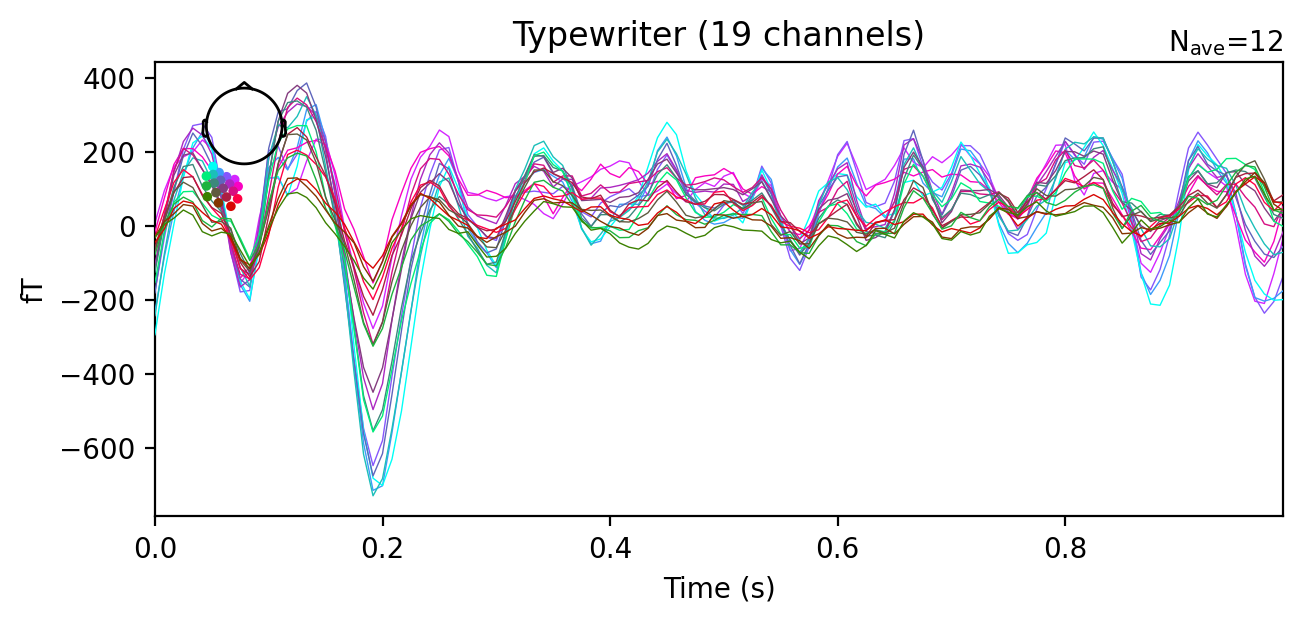

In [14]:
all_epochs[test_labels[16]].pick_channels(mag_ch_names[56:75]).average().plot(titles={'mag': 'Typewriter'});